# Exercise 1: kNN on MNIST
---

In [34]:
from keras.datasets import mnist

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
n_neighbors = 3
random_state = 0

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [37]:
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

In [41]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(
    StandardScaler(), 
    PCA(n_components=2, random_state=random_state)
    )
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

pca.fit(X_train, y_train)  # Fit the method's model
pca_train = pca.transform(X_train)
knn.fit(pca.transform(X_train), y_train)

pca_test = pca.transform(X_test)
acc_knn = knn.score(pca_test, y_test)

print(f'KNN accuracy = {acc_knn}')

KNN accuracy = 0.3356


Visualize neighbor space

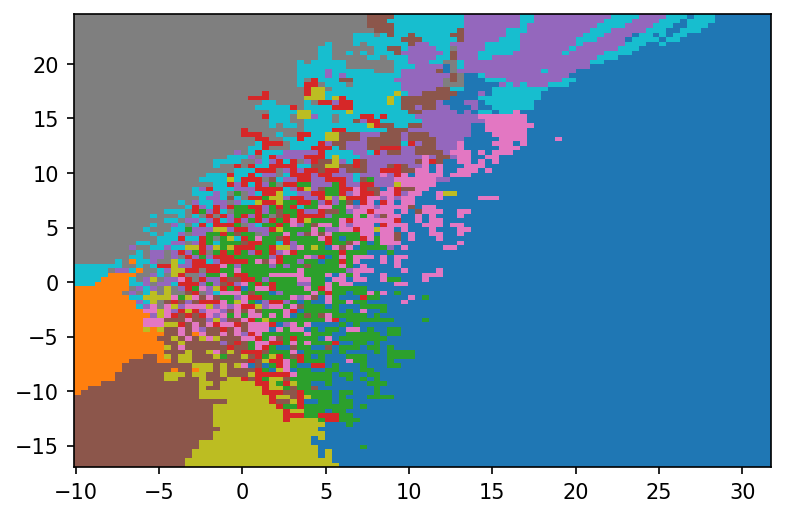

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams['figure.dpi'] = 150

n_neighbors = 15

cmap = matplotlib.cm.get_cmap('tab10')

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    knn, pca_test, # pass here your classifier and data
    cmap=cmap, ax=ax,
    response_method="predict", plot_method="pcolormesh",
    shading="auto",
)